### Merancang sebuah strategi promosi untuk sebuah perusahaan minuman

#### Pendahuluan
Notebook ini adalah salah satu submission untuk kompetisi [datacamp](https://app.datacamp.com/learn/competitions/russian-alcohol-promotions) hingga 31 Oktober 2021. Penulis sendiri tidak ikut didalam kompetisi, namun membuat submission untuk tujuan latihan

_disclaimer_ : Notebook ini tidak sama sekali bertujuan untuk mempromosikan atau mendukung konsumsi minuman keras. Data hanya untuk keperluan analisis semata

#### Latarbelakang 
Perusahaanmu memiliki jaringan toko yang menjual berbagai jenis minuman beralkohol yang menyebar diseluruh Rusia. Sebelumnya perusahaan melakukan promosi dengan sangat sukses di Saint Petersburg. Karena biaya untuk berbisnis, tidak mungkin dilakukan promosi diseluruh wilayah. Marketing akan menargetkan 10 wilayah lainnya yang memiliki kebiasaan pembelian yang serupa seperti di Saint Petersburg dimana mereka mengharapkan bahwa promosi serupa akan sukses

#### Data
Tim marketing telah memberikan kepadamu riwayat volume penjualan perkapita untuk beberapa tipe minuman

- "year" - tahun (1998-2016)
- "region" - nama negara bagian federal Russia. Dapat berupa oblast, republik, krai, otonomi okrug, kota federal and a sebuah otonomi oblast
- "wine" - penjualan wine dalam liter pertahun perkapita
- "beer" - penjualan beer dalam liter pertahun perkapita
- "vodka" - penjualan vodka dalam liter pertahun perkapita
- "champagne" - penjualan champagne dalam liter pertahun perkapita
- "brandy" - penjualan brandy dalam liter pertahun perkapita

#### Apa tujuan dari analisa ?
Ada dua hal yang menjadi tujuan analisa, yaitu menemukan 10 wilayah yang memiliki karakteristik serupa dengan Saint Petersburg dan menceritakan hal apa saja yang mendukung rekomendasi terhadap 10 wilayah tersebut

#### Import library yang diperlukan

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

# Default seaborn style
sns.set()

%matplotlib inline

# Suppress warning
warnings.filterwarnings('ignore')

#### Cek file pada folder root

In [2]:
# Check file on folder
os.listdir('./')

['notebook.ipynb', 'russian_alcohol_consumption.csv']

Import dataset

In [3]:
# Import dataset
df = pd.read_csv('russian_alcohol_consumption.csv', delimiter=',')

df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


#### Ringkasan
Membuat sebuah tabel sederhana yang berisi nama kolom, tipe data, unique, total unique, nilai maksimum, minimum serta rata-rata tiap kolom. Selain itu ada dimensi data berupa baris dan kolom dari dataset

In [4]:
variables = pd.DataFrame(columns=['name', 'type', 'unique', 'no_unique', 'min', 'max', 'mean', 'null'])

for i, col in enumerate(df.columns):
    variables.loc[i] = [col, df[col].dtypes, 
                        df[col].unique().tolist(),
                        df[col].nunique(),
                        0 if df[col].dtypes == 'object' else df[col].min(), 
                        0 if df[col].dtypes == 'object' else df[col].max(), 
                        0 if df[col].dtypes == 'object' else df[col].mean(), 
                        df[col].isnull().sum()]

variables = variables.set_index('name')

print('Number of rows : ', df.shape[0])
print('Number of column : ', df.shape[1])

variables

Number of rows :  1615
Number of column :  7


,type,unique,no_unique,min,max,mean,null
name,,,,,,,
year,int64,"[1998, 1999, 2000, 2001, 2002, 2003, 2004, 200...",19,1998,2016,2007.000000,0
region,object,"[Republic of Adygea, Altai Krai, Amur Oblast, ...",85,0,0,0.000000,0
wine,float64,"[1.9, 3.3, 2.1, 4.3, 2.9, 1.8, 3.4, 1.1, 1.5, ...",210,0.1,18.1,5.628144,63
beer,float64,"[8.8, 19.2, 21.2, 10.6, 18.0, 17.5, 23.0, 32.4...",796,0.4,207.3,51.260148,58
vodka,float64,"[3.4, 11.3, 17.3, 11.7, 9.5, 10.7, 10.8, 9.7, ...",313,0.05,40.6,11.818694,61
champagne,float64,"[0.3, 1.1, 0.7, 0.4, 0.8, 0.9, 0.5, 1.5, 0.6, ...",107,0.1,5.56,1.313177,63
brandy,float64,"[0.1, 0.4, 0.3, 0.2, 0.04, nan, 0.7, 0.6, 0.5,...",76,0.0,2.3,0.526998,66


In [5]:
drinks = ['wine', 'beer', 'vodka', 'champagne', 'brandy']

#### Null value dan imputation
Ternyata terdapat beberapa kolom yang datanya bernilai null yaitu masing-masing minuman. Karena dataset merupakan catatan penjualan dan datanya terurut dari tahun 1998-2016 dan tidak ada penjelasan lebih jauh mengapa data tersebut kosong, kita tidak dapat melakukan drop baris atau kolom. Terlebih lagi pada beberapa wilayah terdapat nilai null pada tahun sebelumnya tetapi lengkap pada tahun-tahun berikutnya. Maka kita coba untuk mengisi nilai null dengan nilai mean

In [6]:
df[drinks] = df[drinks].fillna(df.mean())

#### Bagaimana dengan outlier pada data masing-masing minuman ?
Untuk menjawab hal tersebut terlebih dahulu kita gabungkan data berdasarkan wilayah, kemudian kita akan mencari outlier dengan metode visualisasi boxplot

In [7]:
df_group = df.groupby('region').mean().reset_index()

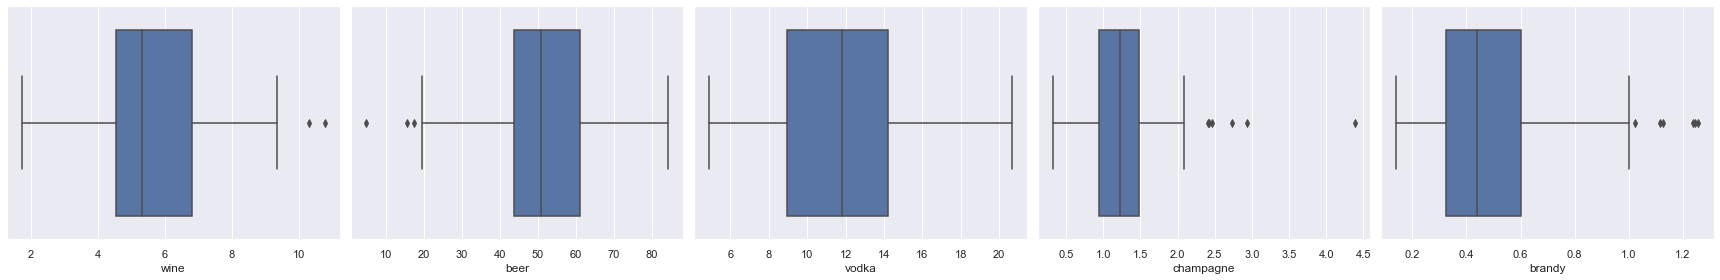

In [8]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(24,4))

for i, col in enumerate(drinks):
    sns.boxplot(data=df_group, x=col, ax=ax[i])

plt.tight_layout()

Outlier pada masing-masing minuman yang tidak signifikan

#### Berapa rata-rata penjualan setiap minuman diseluruh Rusia ? 
Dengan membuat sebuah tabel kita dapat dengan mudah melakukan visualisasi untuk rata-rata penjualan setiap minuman

In [9]:
df_mean_sales = pd.DataFrame(columns=['drink', 'avg', 'min', 'max', 'sum'])

for i, col in enumerate(drinks):
    df_mean_sales.loc[i] = [col, df[col].mean(), df[col].min(), df[col].max(), df[col].sum()]

df_mean_sales = df_mean_sales.sort_values(by='avg', ascending=False)

df_mean_sales

,drink,avg,min,max,sum
1,beer,51.260148,0.40,207.30,82785.138568
2,vodka,11.818694,0.05,40.60,19087.190315
0,wine,5.628144,0.10,18.10,9089.453093
3,champagne,1.313177,0.10,5.56,2120.780122
4,brandy,0.526998,0.00,2.30,851.101872


<AxesSubplot:title={'center':'Average Sales per Drink'}, xlabel='drink', ylabel='avg'>

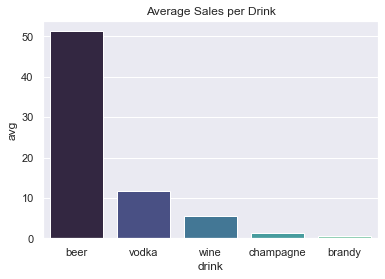

In [10]:
plt.title('Average Sales per Drink')
plt.xlabel('drink')
plt.ylabel('average of sales')

sns.barplot(x=df_mean_sales['drink'], y=df_mean_sales['avg'], palette='mako')

#### Bagaimana dengan penjualan di Saint Petersburg ?

In [11]:
df_petersburg = df_group[df_group.region == 'Saint Petersburg'][drinks].melt().sort_values(by='value', ascending=False)

df_petersburg

,variable,value
1,beer,84.375263
2,vodka,11.821579
0,wine,6.952632
3,champagne,2.468947
4,brandy,1.117368


<AxesSubplot:xlabel='variable', ylabel='value'>

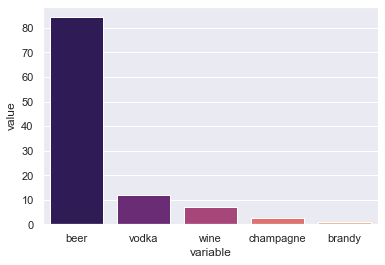

In [12]:
sns.barplot(x=df_petersburg['variable'], y=df_petersburg['value'], palette='magma')

Untuk lebih jelas perbandingan antara penjualan keseluruhan di Rusia dengan di Saint Petersburg kita akan gabungkan grafik sebelumnya dengan grafik rata-rata penjualan pada Saint Petersburg

<AxesSubplot:xlabel='drink', ylabel='avg'>

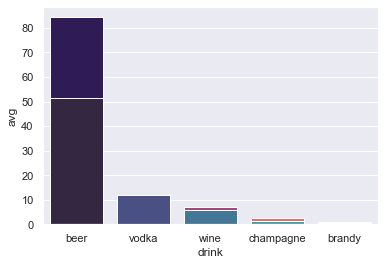

In [13]:
sns.barplot(x=df_petersburg['variable'], y=df_petersburg['value'], palette='magma')
sns.barplot(x=df_mean_sales['drink'], y=df_mean_sales['avg'], palette='mako')

In [14]:
df_temp = pd.DataFrame(data=df[df.region == 'Saint Petersburg'].sum()[2:]).reset_index().sort_values(by='index')
df_temp = df_temp.rename(columns={'index':'variables', 0:'value_petersburg'})
df_temp['value_all'] = df_mean_sales['sum']
df_temp['pct_diff'] = df_temp['value_petersburg'] / df_temp['value_all'] * 100

df_temp

,variables,value_petersburg,value_all,pct_diff
1,beer,1603.13,82785.138568,1.936495
4,brandy,21.23,851.101872,2.494414
3,champagne,46.91,2120.780122,2.211922
2,vodka,224.61,19087.190315,1.176758
0,wine,132.1,9089.453093,1.453333


Secara sederhana, maka penjualan yang memiliki kemiripan ciri dengan Saint Petersburg adalah:
- memiliki rata-rata transaksi lebih tinggi pada beer, wine dan champagne dibanding keseluruhan rata-rata penjualan
- Penjualan pada Saint Peterburg berkontribusi antara 1,17 sampai 2,49% penjualan keseluruhan. Secara spesifik pada tabel diatas

#### Dimension reduction
Pada dataset terdapat 5 jenis minuman, sedangkan pada data yang akan kita visualisasikan nantinya berbentuk 2 dimensi. Dengan begitu kita perlu mereduksi fitur yang kita miliki, salah satunya dengan metode Principal Component Analyst (PCA) dengan 2 n komponen

Terlebih dahulu data kita normalisasi dengan StandardScaler

In [15]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

import numpy as np

scaler = StandardScaler()
scaler.fit(df_group[drinks])
data_scaled = scaler.transform(df_group[drinks])

Untuk mendapatkan nilai variabilitas data per komponen, kita coba lakukan plotting seperti berikut

In [16]:
pca_1 = PCA(n_components=5)
pca_1.fit(data_scaled)
pca_list_1 = pca_1.transform(data_scaled)

df_pca_1 = pd.DataFrame(columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'], data=pca_list_1)

[ 62.53864984  77.35822264  90.09612449  96.61425579 100.        ]


Text(0, 0.5, 'cummulative variability (%)')

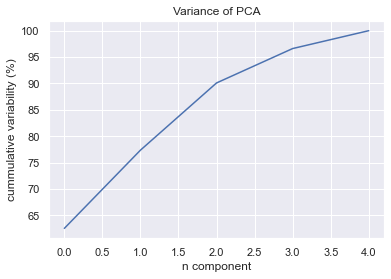

In [17]:
print(np.cumsum(pca_1.explained_variance_ratio_*100))

plt.plot(np.cumsum(pca_1.explained_variance_ratio_*100))

plt.title('Variance of PCA')
plt.xlabel('n component')
plt.ylabel('cummulative variability (%)')

Kita akan gunakan n=2 dengan nilai variabilitasnya adalah 77.35822264%

In [18]:
pca = PCA(n_components=2)
pca.fit(data_scaled)
pca_list = pca.transform(data_scaled)

df_pca = pd.DataFrame(columns=['PCA1', 'PCA2'], data=pca_list)

Kemudian kita akan gabungkan hasil PCA ke DataFrame df_group

In [19]:
df_group = pd.concat([df_group, df_pca], axis=1)

df_group.head()

,region,year,wine,beer,vodka,champagne,brandy,PCA1,PCA2
0,Altai Krai,2007.0,3.174211,48.373158,9.465789,1.207368,0.236842,-1.559082,0.147484
1,Altai Republic,2007.0,5.190000,36.724211,9.683684,0.934737,0.253684,-1.527414,0.064675
2,Amur Oblast,2007.0,5.221579,53.377368,14.216842,1.115789,0.396842,-0.113481,-0.390741
3,Arkhangelsk Oblast,2007.0,8.670000,47.036842,17.381053,1.631053,0.870526,2.226832,0.267036
4,Astrakhan Oblast,2007.0,4.469474,54.695263,9.296842,0.861579,0.361053,-1.184829,-0.501618


#### Clustering
Untuk membuktikan hipotesis diatas kita dapat menggunakan algoritma unsupervised seperti KMeans. Algoritma KMeans akan mengelompokkan data berdasarkan kemiripan secara statistik. Terdapat pusat dari cluster yang disebut sebagai centroid (titik vektor). Dengan begitu data yang memiliki kemiripan dengan Saint Petersburg akan berada pada cluster yang sama. Namun pada penjualan diminta hanya 10 wilayah saja, maka kita akan coba mencari 10 data yang memiliki kemiripan yang lebih dekat dengan titik yang dimiliki oleh Saint Petersburg, yaitu data dengan jarak terdekat dengan titik Saint Petersburg

Kita akan coba untuk menemukan nilai K yang sesuai dengan metode silhouette dengan nilai koefisien terbesar

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

s = []

for i in range(2,12):
    clust = KMeans(i)
    clust.fit_predict(df_pca)

    s.append(silhouette_score(df_pca, clust.labels_))

Text(0, 0.5, 'coef')

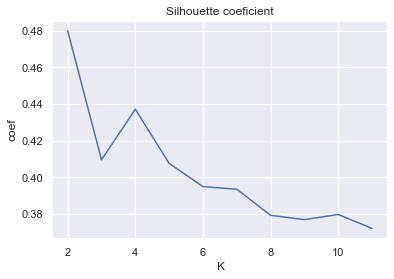

In [21]:
plt.plot(range(2,12), s)
plt.title('Silhouette coeficient')
plt.xlabel('K')
plt.ylabel('coef')

Kita mendapatkan koefisien terbaik pada K=2. Dengan melakukan modelling dengan KMeans dengan nilai K=2, nantinya kita akan mendapatkan 2 cluster. Setiap data yang kita miliki akan kita tandai dengan kode cluster sesuai hasil dari pemodelan. Setelah itu kita dapat visualisasikan

In [22]:
clust = KMeans(2)
clust.fit(df_pca)

df_group['cluster'] = clust.labels_

df_group.head()

,region,year,wine,beer,vodka,champagne,brandy,PCA1,PCA2,cluster
0,Altai Krai,2007.0,3.174211,48.373158,9.465789,1.207368,0.236842,-1.559082,0.147484,0
1,Altai Republic,2007.0,5.190000,36.724211,9.683684,0.934737,0.253684,-1.527414,0.064675,0
2,Amur Oblast,2007.0,5.221579,53.377368,14.216842,1.115789,0.396842,-0.113481,-0.390741,0
3,Arkhangelsk Oblast,2007.0,8.670000,47.036842,17.381053,1.631053,0.870526,2.226832,0.267036,1
4,Astrakhan Oblast,2007.0,4.469474,54.695263,9.296842,0.861579,0.361053,-1.184829,-0.501618,0


#### Di cluster manakah Saint Petersburg ? 

In [23]:
petersburg = df_group[df_group.region == 'Saint Petersburg']

petersburg

,region,year,wine,beer,vodka,champagne,brandy,PCA1,PCA2,cluster
61,Saint Petersburg,2007.0,6.952632,84.375263,11.821579,2.468947,1.117368,3.065823,0.042125,1


Kita telah mengetahui bahwa Saint Petersburg berada pada cluster 1. Sekarang kita akan mengelompokkan data mana saja yang berada pada satu cluster dengan Saint Petersburg, yaitu cluster 1

In [24]:
petersburg_cluster = df_group[df_group.cluster == int(petersburg.cluster)]

petersburg_cluster

,region,year,wine,beer,vodka,champagne,brandy,PCA1,PCA2,cluster
3,Arkhangelsk Oblast,2007.0,8.670000,47.036842,17.381053,1.631053,0.870526,2.226832,0.267036,1
8,Chelyabinsk Oblast,2007.0,6.944211,74.147368,12.943684,1.465263,0.560526,1.161423,-1.130868,1
11,Irkutsk Oblast,2007.0,6.352632,61.862632,12.920000,1.326316,0.532105,0.578259,-0.615872,1
12,Ivanovo Oblast,2007.0,7.237368,73.001053,12.360000,0.945789,0.371053,0.363882,-1.829206,1
15,Kaliningrad Oblast,2007.0,7.635789,55.923684,14.134211,1.522632,1.238421,2.354603,0.547172,1
17,Kamchatka Krai,2007.0,7.278421,59.572105,19.712105,2.736842,1.245263,4.079852,1.399657,1
19,Kemerovo Oblast,2007.0,5.262105,57.677368,15.605263,1.209474,0.484737,0.419433,-0.406207,1
20,Khabarovsk Krai,2007.0,5.220526,70.191579,15.377368,1.977895,0.704737,1.679245,-0.010045,1
21,Khanty–Mansi Autonomous Okrug – Yugra,2007.0,5.320526,73.845263,15.012105,1.446842,0.924211,1.725873,-0.315729,1
23,Komi Republic,2007.0,9.223684,65.744211,20.654211,1.697368,0.810000,3.168978,-0.754260,1


Berikut adalah visualisasi dari hasil clustering yang telah dilakukan

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

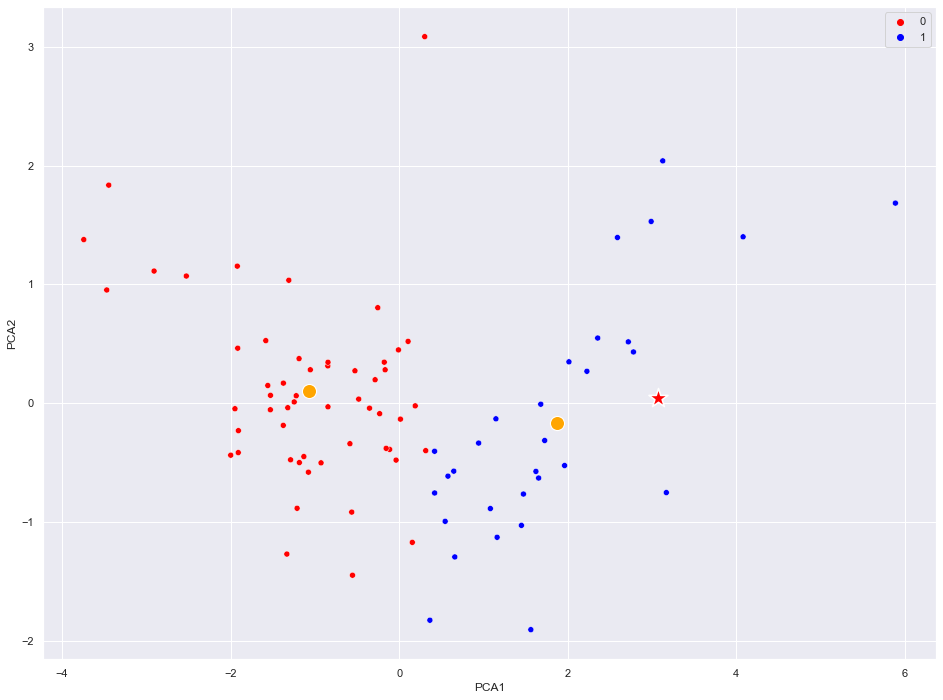

In [25]:
plt.figure(figsize=(16,12))

sns.scatterplot(data=df_group, x='PCA1', y='PCA2', hue='cluster', palette=['red', 'blue'])
sns.scatterplot(data=df_group[df_group.region == 'Saint Petersburg'], x='PCA1', y='PCA2', s=400, color='red', marker='*')
sns.scatterplot(clust.cluster_centers_[:,0], clust.cluster_centers_[:,1], s=200, color='orange', marker='o')

Gambar diatas menunjukkan dua cluster yang terbagi dua, cluster 0 dengan bulatan merah dan cluster 1 dengan bulatan biru. Bulatan orange merupakan centroid dari masing-masing cluster, sedangkan bintang merah adalah point dari Saint Petersburg

Selanjutnya dengan metode cosine similarity kita akan menentukan point mana saja yang paling dekat dengan Saint Petersburg

In [26]:
centroid = np.array([3.065823, 0.042125])

from scipy.spatial import distance

petersburg_cluster['distance'] = 0

for index, col in enumerate(petersburg_cluster[['PCA1', 'PCA2']].itertuples()):
    point = np.array([col.PCA1, col.PCA2])

    petersburg_cluster['distance'].iloc[index] = distance.cosine(centroid, point).round(8)

petersburg_cluster

,region,year,wine,beer,vodka,champagne,brandy,PCA1,PCA2,cluster,distance
3,Arkhangelsk Oblast,2007.0,8.670000,47.036842,17.381053,1.631053,0.870526,2.226832,0.267036,1,0.005571
8,Chelyabinsk Oblast,2007.0,6.944211,74.147368,12.943684,1.465263,0.560526,1.161423,-1.130868,1,0.293184
11,Irkutsk Oblast,2007.0,6.352632,61.862632,12.920000,1.326316,0.532105,0.578259,-0.615872,1,0.325586
12,Ivanovo Oblast,2007.0,7.237368,73.001053,12.360000,0.945789,0.371053,0.363882,-1.829206,1,0.818387
15,Kaliningrad Oblast,2007.0,7.635789,55.923684,14.134211,1.522632,1.238421,2.354603,0.547172,1,0.022937
17,Kamchatka Krai,2007.0,7.278421,59.572105,19.712105,2.736842,1.245263,4.079852,1.399657,1,0.049746
19,Kemerovo Oblast,2007.0,5.262105,57.677368,15.605263,1.209474,0.484737,0.419433,-0.406207,1,0.291284
20,Khabarovsk Krai,2007.0,5.220526,70.191579,15.377368,1.977895,0.704737,1.679245,-0.010045,1,0.000194
21,Khanty–Mansi Autonomous Okrug – Yugra,2007.0,5.320526,73.845263,15.012105,1.446842,0.924211,1.725873,-0.315729,1,0.018890
23,Komi Republic,2007.0,9.223684,65.744211,20.654211,1.697368,0.810000,3.168978,-0.754260,1,0.030449


Data tersebut akan kita berikan ranking mulai dari terdekat hingga yang terjauh. Semakin dekat jarak antara point Saint Petersburg maka nilainya akan mendekati nol

In [27]:
petersburg_cluster['rank'] = petersburg_cluster['distance'].rank()

petersburg_cluster = petersburg_cluster[petersburg_cluster['region'] != 'Saint Petersburg'].sort_values(by='distance')

petersburg_cluster.head(10)

,region,year,wine,beer,vodka,champagne,brandy,PCA1,PCA2,cluster,distance,rank
20,Khabarovsk Krai,2007.0,5.220526,70.191579,15.377368,1.977895,0.704737,1.679245,-0.010045,1,0.000194,2.0
3,Arkhangelsk Oblast,2007.0,8.670000,47.036842,17.381053,1.631053,0.870526,2.226832,0.267036,1,0.005571,3.0
74,Tver Oblast,2007.0,7.036316,54.011053,15.203158,1.655263,0.547895,1.147267,-0.133096,1,0.008339,4.0
29,Leningrad Oblast,2007.0,7.786316,61.000000,15.809474,2.090526,1.022105,2.779095,0.429975,1,0.009751,5.0
34,Moscow Oblast,2007.0,6.126316,62.602105,15.187368,1.703684,1.000526,2.013620,0.346848,1,0.012274,6.0
36,Nenets Autonomous Okrug,2007.0,8.985789,47.365263,17.846842,1.913684,0.939474,2.718172,0.515026,1,0.015016,7.0
21,Khanty–Mansi Autonomous Okrug – Yugra,2007.0,5.320526,73.845263,15.012105,1.446842,0.924211,1.725873,-0.315729,1,0.018890,8.0
15,Kaliningrad Oblast,2007.0,7.635789,55.923684,14.134211,1.522632,1.238421,2.354603,0.547172,1,0.022937,9.0
23,Komi Republic,2007.0,9.223684,65.744211,20.654211,1.697368,0.810000,3.168978,-0.754260,1,0.030449,10.0
33,Moscow,2007.0,7.381579,83.688421,19.022105,4.386316,1.257895,5.887030,1.683451,1,0.034852,11.0


Berikut adalah visualisasinya

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

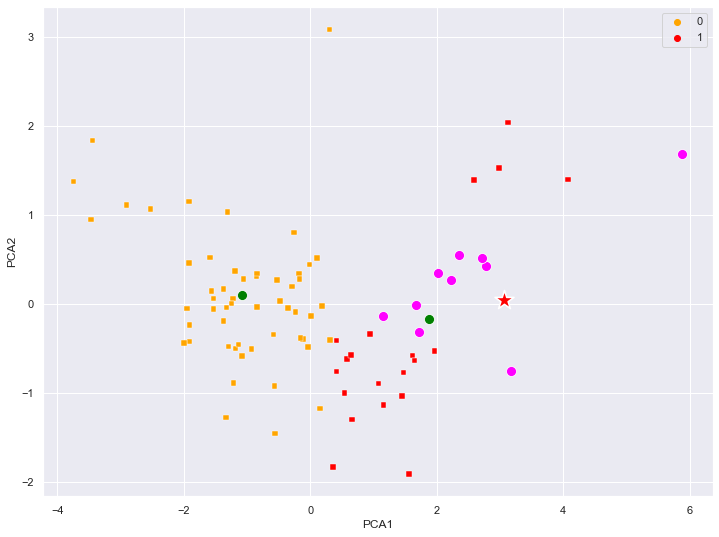

In [28]:
plt.figure(figsize=(12,9))

sns.scatterplot(data=df_group, x='PCA1', y='PCA2', palette=['orange', 'red'], hue='cluster', marker='s', s=30)
sns.scatterplot(clust.cluster_centers_[:,0], clust.cluster_centers_[:,1], s=100, color='green', marker='o')
sns.scatterplot(data=df_group[df_group.region == 'Saint Petersburg'], x='PCA1', y='PCA2', s=400, color='red', marker='*')
sns.scatterplot(data=petersburg_cluster.head(10), x='PCA1', y='PCA2', s=100, color='magenta')

Bulatan yang berwarna magenta adalah point yang memiliki jarak terdekat dengan Saint Petersburg

#### Apakah hipotesis 1 dan 2 terpenuhi ?
Kita akan buktikan hipotesis 1 mengenai penjualan rata-rata beer, wine dan champagne dengan wilayah yang memiliki karakteristik yang mirip dengan Saint Petersburg dan hipotesis 2 mengenai penjualan keseluruhan per tiap minuman 1,17 sampai 2,49%. Sebagai contoh kita ambil wilayah __Leningrad Oblast__ dan __Moscow__ sebagai representasi cluster 1 serta __Republic of Crimea__ dan __Kirov Oblast__ sebagai representasi cluster 0

Buat dataframe untuk Leningrad Oblast

In [29]:
df_leningrad = df_group[df_group.region == 'Leningrad Oblast'][drinks].melt().sort_values(by='value', ascending=False)

df_leningrad

,variable,value
1,beer,61.000000
2,vodka,15.809474
0,wine,7.786316
3,champagne,2.090526
4,brandy,1.022105


Buat dataframe untuk Moscow

In [30]:
df_moscow = df_group[df_group.region == 'Moscow'][drinks].melt().sort_values(by='value', ascending=False)

df_moscow

,variable,value
1,beer,83.688421
2,vodka,19.022105
0,wine,7.381579
3,champagne,4.386316
4,brandy,1.257895


Buat dataframe untuk Republic of Crimea

In [31]:
df_crimea = df_group[df_group.region == 'Republic of Crimea'][drinks].melt().sort_values(by='value', ascending=False)

df_crimea

,variable,value
1,beer,48.487493
2,vodka,10.626268
0,wine,5.376332
3,champagne,1.321622
4,brandy,0.585893


Buat dataframe untuk Arkhangelsk Oblast

In [32]:
df_kirov = df_group[df_group.region == 'Kirov Oblast'][drinks].melt().sort_values(by='value', ascending=False)

df_kirov

,variable,value
1,beer,55.628947
2,vodka,13.210000
0,wine,7.733158
3,champagne,0.990526
4,brandy,0.334211


Gabungkan keseluruhan dataframe diatas untuk dibandingkan

In [33]:
df_compare = pd.concat([df_leningrad, df_moscow['value']], axis=1)
df_compare = pd.concat([df_compare, df_crimea['value']], axis=1)
df_compare = pd.concat([df_compare, df_kirov['value']], axis=1)

df_compare

,variable,value,value,value,value
1,beer,61.000000,83.688421,48.487493,55.628947
2,vodka,15.809474,19.022105,10.626268,13.210000
0,wine,7.786316,7.381579,5.376332,7.733158
3,champagne,2.090526,4.386316,1.321622,0.990526
4,brandy,1.022105,1.257895,0.585893,0.334211


Rename value

In [34]:
df_compare.columns = ['variable', 'leningrad', 'moscow', 'crimea', 'kirov']

df_compare

,variable,leningrad,moscow,crimea,kirov
1,beer,61.000000,83.688421,48.487493,55.628947
2,vodka,15.809474,19.022105,10.626268,13.210000
0,wine,7.786316,7.381579,5.376332,7.733158
3,champagne,2.090526,4.386316,1.321622,0.990526
4,brandy,1.022105,1.257895,0.585893,0.334211


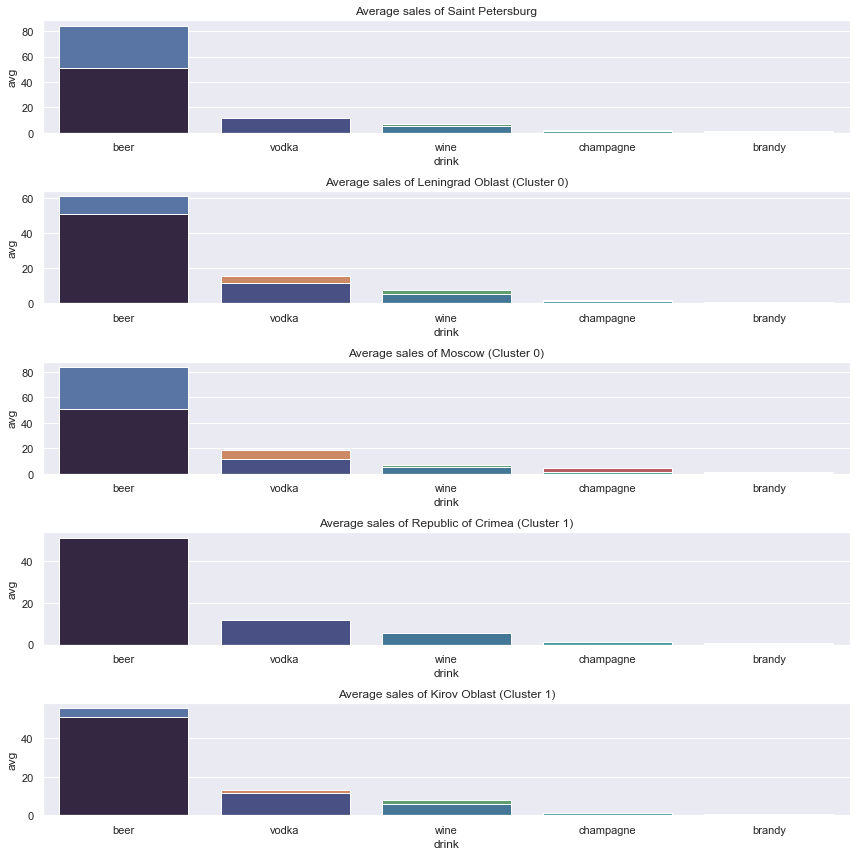

In [35]:
fig, ax = plt.subplots(nrows=5, figsize=(12,12))

ax[0].set_title('Average sales of Saint Petersburg')

sns.barplot(x=df_petersburg['variable'], y=df_petersburg['value'], ax=ax[0])
sns.barplot(x=df_mean_sales['drink'], y=df_mean_sales['avg'], palette='mako', ax=ax[0])

sns.barplot(x=df_compare['variable'], y=df_compare['leningrad'],ax=ax[1])
sns.barplot(x=df_mean_sales['drink'], y=df_mean_sales['avg'], palette='mako', ax=ax[1])

ax[1].set_title('Average sales of Leningrad Oblast (Cluster 0)')

sns.barplot(x=df_compare['variable'], y=df_compare['moscow'], ax=ax[2])
sns.barplot(x=df_mean_sales['drink'], y=df_mean_sales['avg'], palette='mako', ax=ax[2])

ax[2].set_title('Average sales of Moscow (Cluster 0)')

sns.barplot(x=df_compare['variable'], y=df_compare['crimea'], ax=ax[3])
sns.barplot(x=df_mean_sales['drink'], y=df_mean_sales['avg'], palette='mako', ax=ax[3])

ax[3].set_title('Average sales of Republic of Crimea (Cluster 1)')

sns.barplot(x=df_compare['variable'], y=df_compare['kirov'], ax=ax[4])
sns.barplot(x=df_mean_sales['drink'], y=df_mean_sales['avg'], palette='mako', ax=ax[4])

ax[4].set_title('Average sales of Kirov Oblast (Cluster 1)')

plt.tight_layout()

#### Bagaimana dengan hipotesis 2

In [36]:
df_petersburg_all = pd.DataFrame(data=df[df.region == 'Saint Petersburg'].sum()[2:]).reset_index().sort_values(by='index')
df_leningrad_all = pd.DataFrame(data=df[df.region == 'Leningrad Oblast'].sum()[2:]).reset_index().sort_values(by='index')
df_moscow_all = pd.DataFrame(data=df[df.region == 'Moscow'].sum()[2:]).reset_index().sort_values(by='index')
df_crimea_all = pd.DataFrame(data=df[df.region == 'Republic of Crimea'].sum()[2:]).reset_index().sort_values(by='index')
df_kirov_all = pd.DataFrame(data=df[df.region == 'Kirov Oblast'].sum()[2:]).reset_index().sort_values(by='index')

df_all = pd.DataFrame(columns=['variables', 'all_value', 'petersburg_sales', 'leningrad_sales_0', 'moscow_sales_0', 'crimea_sales_1', 
                                'kirov_sales_1', 'petersburg_pct_diff', 'leningrad_pct_diff_0', 'moscow_pct_diff_0', 'crimea_pct_diff_1', 'kirov_pct_diff_1'])

df_all['variables'] = df_mean_sales['drink']
df_all['all_value'] = df_mean_sales['sum']
df_all['petersburg_sales'] = df_petersburg_all[0]
df_all['leningrad_sales_0'] = df_leningrad_all[0]
df_all['moscow_sales_0'] = df_moscow_all[0]
df_all['crimea_sales_1'] = df_crimea_all[0]
df_all['kirov_sales_1'] = df_kirov_all[0]

df_all['petersburg_pct_diff'] = df_all['petersburg_sales'] / df_temp['value_all'] * 100
df_all['leningrad_pct_diff_0'] = df_all['leningrad_sales_0'] / df_temp['value_all'] * 100
df_all['moscow_pct_diff_0'] = df_all['moscow_sales_0'] / df_temp['value_all'] * 100
df_all['crimea_pct_diff_1'] = df_all['crimea_sales_1'] / df_temp['value_all'] * 100
df_all['kirov_pct_diff_1'] = df_all['kirov_sales_1'] / df_temp['value_all'] * 100

df_all

,variables,all_value,petersburg_sales,leningrad_sales_0,moscow_sales_0,crimea_sales_1,kirov_sales_1,petersburg_pct_diff,leningrad_pct_diff_0,moscow_pct_diff_0,crimea_pct_diff_1,kirov_pct_diff_1
1,beer,82785.138568,1603.13,1159.0,1590.08,921.262364,1056.95,1.936495,1.40001,1.920731,1.112835,1.276739
2,vodka,19087.190315,224.61,300.38,361.42,201.899099,250.99,1.176758,1.573726,1.893521,1.057773,1.314966
0,wine,9089.453093,132.1,147.94,140.25,102.150309,146.93,1.453333,1.627601,1.542997,1.123833,1.616489
3,champagne,2120.780122,46.91,39.72,83.34,25.110825,18.82,2.211922,1.872896,3.929686,1.184037,0.887409
4,brandy,851.101872,21.23,19.42,23.9,11.131969,6.35,2.494414,2.281748,2.808124,1.307948,0.746092


#### Kesimpulan
1. Maka dari analisis yang kita lakukan dapat direkomendasikan 10 wilayah untuk dilakukan promosi dengan karakteristik yang mirip dengan wilayah Saint Petersburg, yaitu:
- Khabarovsk Krai
- Arkhangelsk Oblast
- Tver Oblast
- Leningrad Oblast
- Moscow Oblast
- Nenets Autonomous Okrug
- Khanty–Mansi Autonomous Okrug – Yugra
- Kaliningrad Oblast
- Komi Republic
- Moscow

2. Secara persentase penjualan rata-rata tidak dapat dibuktikan bahwa pada daerah dengan cluster yang sama memiliki penjualan beer, wine dan champagne yang lebih besar dari rata-rata penjualan.  Namun secara umum karakteristik dari penjualan yang mirip dengan Saint Petersburg adalah daerah dengan penjualan beer dan wine diatas rata-rata penjualan keseluruhan dengan penjualan beer yang signifikan atau 3 sampai 4 minuman yang dijual dengan rata-rata penjualan yang tidak begitu relatif besar dibanding rata-rata penjualan keseluruhan